In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers_df = pd.read_csv(r'C:\Users\admin\Desktop\New folder (2)\Customers.csv')
products_df = pd.read_csv(r'C:\Users\admin\Desktop\New folder (2)\Products.csv')
transactions_df = pd.read_csv(r'C:\Users\admin\Desktop\New folder (2)\Transactions.csv')

In [5]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

In [6]:
customer_data = merged_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [7]:
customer_profile = customers_df[['CustomerID', 'Region']]
customer_data = pd.merge(customer_data, customer_profile, on='CustomerID', how='inner')

In [8]:
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

In [10]:
customer_data.head()

,CustomerID,total_spent,total_transactions,avg_transaction_value,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,5,670.904,0,0,1
1,C0002,1862.74,4,465.685,0,0,0
2,C0003,2725.38,4,681.345,0,0,1
3,C0004,5354.88,8,669.360,0,0,1
4,C0005,2034.24,3,678.080,0,0,0


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(columns=['CustomerID']))

In [11]:
inertia = []
for k in range(2, 11):  # Trying k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

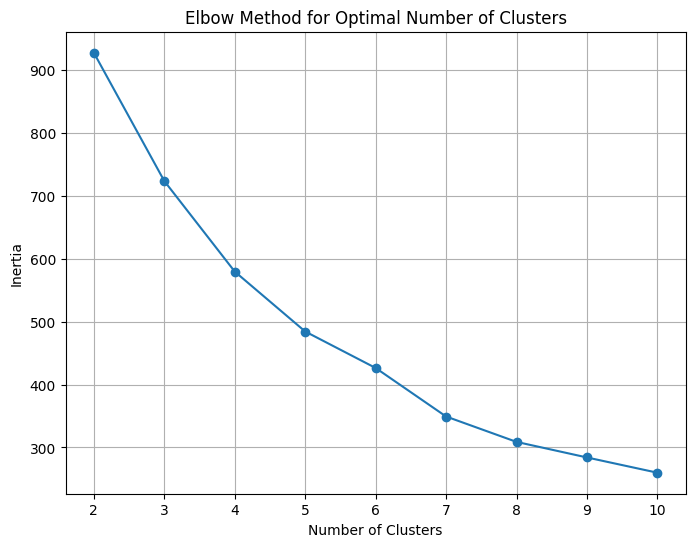

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [63]:
kmeans = KMeans(n_clusters=7, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [64]:
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.3f}')

Davies-Bouldin Index: 0.972


In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [67]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']

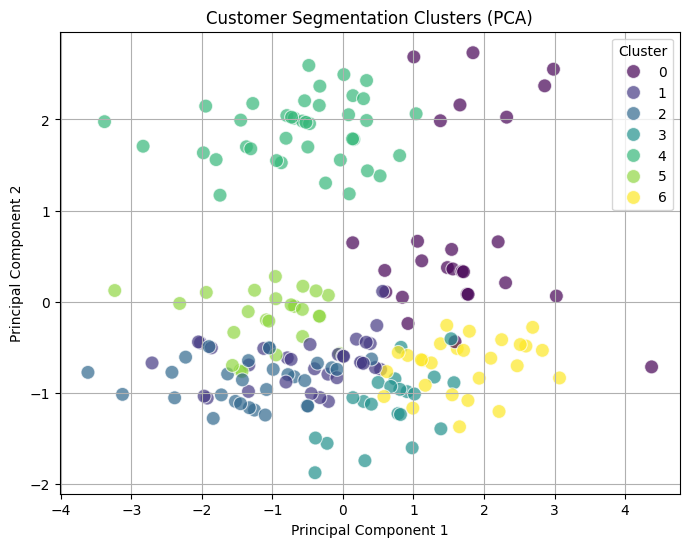

Number of clusters formed: 7


In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Reporting clustering results
print(f"Number of clusters formed: {len(np.unique(customer_data['Cluster']))}")